In [25]:
#Importing the useful Libraries


#dataFrame manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# pd.set_option("Display.max_columns", None)
# pd.set_option("Display.max_rows", None)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

## <span style="color:lightblue">**Problem Statement  4:**</span>
The 'seeds.csv' dataset contains the data about the wheat seeds, the 'Type' column consist of three unique values, 1, 2, 3, which are classified based on the characteristics of seeds entailing in other columns


Load the 'seeds.csv' dataset into a DataFrame and perform the following tasks:
1. Considering the 'Type' column as target, analyse the target column by printing the unique values
2. Separate the feature vectors and the target variable
3. Split the dataset into train and test sets in a 70:30 ratio
4. Build a Decision Tree Classifier and a GuassianNB model and print their accuracy scores
5. For the Decision Tree Classifier and a GuassianNB models boost the accuracy using ADA Boost Classifier and compare the accuracy scores with original models using a bar plot

In [3]:
seed_df = pd.read_csv("./../Assignment_files/Assignment6/seeds.csv")
seed_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
#Task 1: Considering the 'Type' Column as target, analyze the target column by printing the unique values
counts = seed_df["Type"].value_counts()
percentage = seed_df["Type"].value_counts()/seed_df["Type"].count()
unique_type = pd.DataFrame({"Counts":counts, "Percentage":percentage})
unique_type

,Counts,Percentage
Type,,
2,68,0.341709
1,66,0.331658
3,65,0.326633


In [24]:
#Task2: Separating the feature vectors and the target variable
X = seed_df.drop("Type", axis=1)
y = seed_df["Type"]

#Task3: Spliting the dataset into train and test sets in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Task 4: Building a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
dt_clf = DecisionTreeClassifier(random_state=42)
gnb_clf = GaussianNB()

#for decision tree classifier
dt_clf.fit(X_train, y_train)
dt_y_preds = dt_clf.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_y_preds)

#for gaussianNB classifier
gnb_clf.fit(X_train, y_train)
gnb_y_preds = gnb_clf.predict(X_test)
gnb_acc_score = accuracy_score(y_test, gnb_y_preds)

print(f"""
Accuracy score of the Decision tree model is:
{dt_acc_score}

Accuracy score of the GaussianNB model is:
{gnb_acc_score}
""")


Accuracy score of the Decision tree model is:
0.9166666666666666

Accuracy score of the GaussianNB model is:
0.9333333333333333




Accuracy score of the Boosted Decision tree model is:
0.9

Accuracy score of the Boosted GaussianNB model is:
0.9



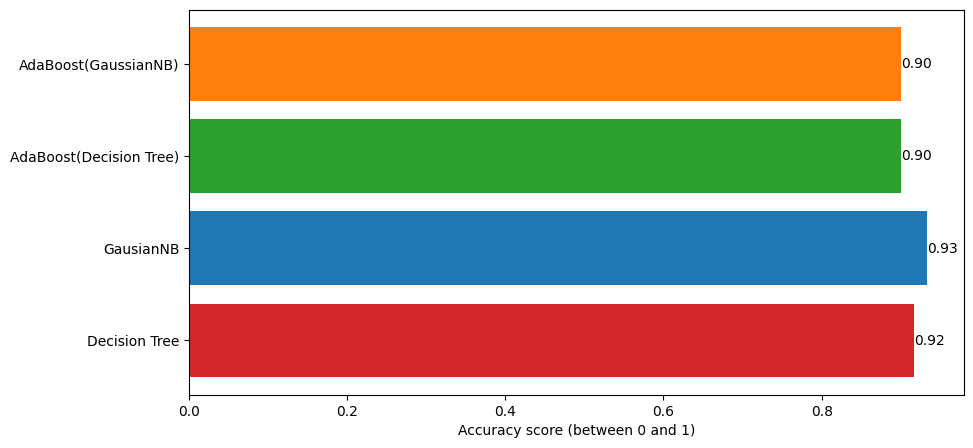

In [45]:
#Task 5: Boosting the model accuracy using ADA Boost Classifier and comparing the accuracy scores with original models 
#
dt_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
gnb_AdaBoost =  AdaBoostClassifier(estimator=GaussianNB(), random_state=42)

#for dt_classifier
dt_AdaBoost.fit(X_train, y_train)
dt_AdaBoost_preds = dt_AdaBoost.predict(X_test)
dt_AdaBoost_acc = accuracy_score(y_test, dt_AdaBoost_preds)

#for gnb classifier
gnb_AdaBoost.fit(X_train, y_train)
gnb_AdaBoost_preds = gnb_AdaBoost.predict(X_test)
gnb_AdaBoost_acc = accuracy_score(y_test, gnb_AdaBoost_preds)

print(f"""
Accuracy score of the Boosted Decision tree model is:
{dt_AdaBoost_acc}

Accuracy score of the Boosted GaussianNB model is:
{gnb_AdaBoost_acc}
""")

#comparing the boosted accuracies using a bar plot
fig, ax = plt.subplots(figsize=(10, 5))
clfs = ["Decision Tree", "GausianNB", "AdaBoost(Decision Tree)", "AdaBoost(GaussianNB)"]
clf_scores = [dt_acc_score,  gnb_acc_score, dt_AdaBoost_acc, gnb_AdaBoost_acc]
labels = clfs
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
hbars = ax.barh(clfs, clf_scores, label=labels, color=bar_colors)
ax.set_xlabel("Accuracy score (between 0 and 1)")
ax.bar_label(hbars, fmt="%.2f");